## Ejercicio 2: Python y NLTK. POS tagging

Objetivo: Uso de NLTK y Python. Procesamiento de corpus, POS tagging.
Referencias: 
http://www.nltk.org/
http://www.python.org/ 
1. Procesamiento del corpus cess_esp anotado con información morfosintáctica.

        • Descargar corpus usando NLTK.
        • Procesar el corpus para transformar la anotación de las etiquetas originales 
        (289 etiquetas) a un conjunto reducido (66 etiquetas). Para realizar esta 
        transformación utilizar los siguientes criterios: todas las etiquetas serán de 
        longitud igual a 2 por defecto, salvo los verbos (v) y los signos de puntuación 
        (F) que pueden ser de tres. También pueden existir etiquetas de longitud =1. 
        En el conjunto transformado también se deben eliminar anotaciones de la 
        forma: (u'*0*', u'sn'). 
        • Nota: para entender el significado de las etiquetas se puede consultar el 
        siguiente enlace: 
        https://freeling-user-manual.readthedocs.io/en/latest/tagsets/
        • Dividir el corpus en dos partes: training (el 90% de las primeras frases) y de 
        test (el 10% restante)

### Carga del corpus

In [1]:
import nltk 

In [2]:
from nltk.corpus import cess_esp

#### Transformar la anotación de las etiquetas originales (289 etiquetas) a un conjunto reducido (66 etiquetas)

In [3]:
corpus_sentences=cess_esp.tagged_sents() # extraemos las oraciones etiquetadas
number_sentences=len(corpus_sentences)
print ('Número de frases:',number_sentences)
nw=0;
for s in range (len(corpus_sentences)):
    nw=nw+len(corpus_sentences[s])

print ('Número de palabras:',nw)

print(corpus_sentences[0:2]) # muestro las 2 primeras oraciones del corpus etiquetado

Número de frases: 6030
Número de palabras: 192686
[[('El', 'da0ms0'), ('grupo', 'ncms000'), ('estatal', 'aq0cs0'), ('Electricité_de_France', 'np00000'), ('-Fpa-', 'Fpa'), ('EDF', 'np00000'), ('-Fpt-', 'Fpt'), ('anunció', 'vmis3s0'), ('hoy', 'rg'), (',', 'Fc'), ('jueves', 'W'), (',', 'Fc'), ('la', 'da0fs0'), ('compra', 'ncfs000'), ('del', 'spcms'), ('51_por_ciento', 'Zp'), ('de', 'sps00'), ('la', 'da0fs0'), ('empresa', 'ncfs000'), ('mexicana', 'aq0fs0'), ('Electricidad_Águila_de_Altamira', 'np00000'), ('-Fpa-', 'Fpa'), ('EAA', 'np00000'), ('-Fpt-', 'Fpt'), (',', 'Fc'), ('creada', 'aq0fsp'), ('por', 'sps00'), ('el', 'da0ms0'), ('japonés', 'aq0ms0'), ('Mitsubishi_Corporation', 'np00000'), ('para', 'sps00'), ('poner_en_marcha', 'vmn0000'), ('una', 'di0fs0'), ('central', 'ncfs000'), ('de', 'sps00'), ('gas', 'ncms000'), ('de', 'sps00'), ('495', 'Z'), ('megavatios', 'ncmp000'), ('.', 'Fp')], [('Una', 'di0fs0'), ('portavoz', 'nccs000'), ('de', 'sps00'), ('EDF', 'np00000'), ('explicó', 'vmis3s0

In [4]:
def rename(x):
    if x.startswith("v") or x.startswith("F"): #Si la etiqueta es de un verbo o signo de
        return x[:min(len(x),3)] #longitud máxima puede ser 3
    
    else: #Cualquier otra etiqueta long max
        return x[:min(len(x),2)] # por defecto, para lo demás la long máx es 2

In [5]:
newsentences=[]
for sentence in corpus_sentences[:1000]:
    newsent=[(x[0], rename(x[1])) for x in sentence if not(x[1] in (u'*0*',u'sn'))] # elimino este tipo de etiquetas porque directamente las omito
    newsentences.append(newsent)

In [6]:
#print(newsentences)

2. Uso de etiquetadores morfosintácticos (usar los modelos hmm y tnt). 

    • Saber entrenar el etiquetador con la partición de entrenamiento previamente 
    transformada 
    
    • Saber etiquetar un conjunto de test con el modelo aprendido 
    
    • Evaluar las prestaciones de un etiquetador 
    
    
    

3. Hacer una evaluación de las prestaciones de etiquetado usando todo el corpus (10-fold cross validation). Se propone hacer las 10 particiones usando el corpus reducido en el orden original y barajándolo (sugerencia: se puede usar el método shuffle importándolo del módulo random “from random import shuffle”). Comprobar si al barajar el corpus se observan diferencias en los resultados de cada partición

In [7]:
# dividir conjunto de entrenamiento: 90% train, 10% test

from sklearn.model_selection import train_test_split
train,test= train_test_split(newsentences,test_size=0.1, random_state=1234)

#### Entrenamos un HMM y realizamos un 10-Fold

In [8]:
from nltk.tag import hmm

tagger_hmm=hmm.HiddenMarkovModelTagger.train(train) # le pasamos la lista de listas para entrenar
acc=tagger_hmm.accuracy(test) #deprecated !!!! --> tagger_hmm.accuracy(test)

print("Accuracy del tagger HMM:", acc)

#tagger_hmm.tag(words) #lista de listas de solo las palabras para ver como etiqueta

Accuracy del tagger HMM: 0.9047133757961784


In [9]:
import numpy as np 
from sklearn.model_selection import KFold 
folds=10 
newsentences=np.asarray(newsentences) 
kf=KFold(n_splits=folds) 
results=[] 
for train_index, test_index in kf.split(newsentences):   
    x_train,x_test = newsentences[train_index],newsentences[test_index]  
    tagger_hmm=hmm.HiddenMarkovModelTagger.train(x_train)  
    result=tagger_hmm.evaluate(x_test) 
    print('Results quality:', result) 
    

C:\Users\annal\AppData\Local\Temp\ipykernel_7904\2847999710.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  newsentences=np.asarray(newsentences)
C:\Users\annal\AppData\Local\Temp\ipykernel_7904\2847999710.py:10: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  result=tagger_hmm.evaluate(x_test)


Results quality: 0.8805013115709706
Results quality: 0.8836833602584814
Results quality: 0.8871781258295726
Results quality: 0.8936011904761905
Results quality: 0.875267094017094
Results quality: 0.8810463968410661
Results quality: 0.875
Results quality: 0.8795799299883313
Results quality: 0.8841601611684714
Results quality: 0.8786301369863013


#### Visualizamos los accuracy obtenidos con el 10-Fold de HMM 

In [10]:
import numpy as np 
from sklearn.model_selection import KFold 
folds=10 
newsentences=np.asarray(newsentences) 
kf=KFold(n_splits=folds) 
scores=[] 
for train_index, test_index in kf.split(newsentences):   
    x_train,x_test = newsentences[train_index],newsentences[test_index]  
    tagger_hmm=hmm.HiddenMarkovModelTagger.train(x_train)
    result=tagger_hmm.accuracy(x_test) 
    print('Accuracy HMM = ', result) 
    scores.append(result) 


Accuracy HMM =  0.8805013115709706
Accuracy HMM =  0.8836833602584814
Accuracy HMM =  0.8871781258295726
Accuracy HMM =  0.8936011904761905
Accuracy HMM =  0.875267094017094
Accuracy HMM =  0.8810463968410661
Accuracy HMM =  0.875
Accuracy HMM =  0.8795799299883313
Accuracy HMM =  0.8841601611684714
Accuracy HMM =  0.8786301369863013


In [11]:
std_dev = np.std(scores)
print(std_dev)

0.005323700785784557


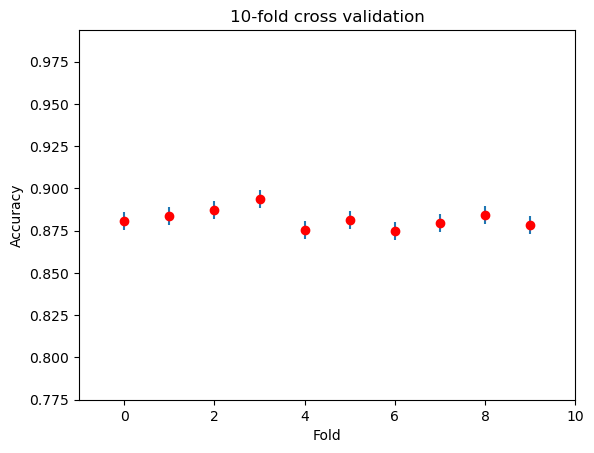

In [12]:
import matplotlib.pyplot as plt 
x=[i for i in range(folds)] 
y=scores 
plt.axis([-1,10, min(scores)-0.1, max(scores)+0.1]) 
plt.ylabel('Accuracy') 
plt.xlabel('Fold') 
plt.title(f'{folds}-fold cross validation') 
plt.errorbar(x,y,yerr=std_dev,linestyle='None')
plt.plot(x,y,'ro') 
plt.show()

#### Entrenamos un TNT y realizamos un 10-Fold

In [13]:
from nltk.tag import tnt

tagger_tnt = tnt.TnT()
tagger_tnt.train(train)  

acc = tagger_tnt.evaluate(test) 

print("Accuracy del tagger HMM:", acc)


C:\Users\annal\AppData\Local\Temp\ipykernel_7904\88274612.py:6: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  acc = tagger_tnt.evaluate(test)


Accuracy del tagger HMM: 0.8619108280254777


In [14]:
import numpy as np 
from sklearn.model_selection import KFold 
folds=10 
newsentences=np.asarray(newsentences) 
kf=KFold(n_splits=folds) 
scores=[] 
for train_index, test_index in kf.split(newsentences):   
    x_train,x_test = newsentences[train_index],newsentences[test_index]  
    tagger_tnt = tnt.TnT()
    tagger_tnt.train(x_train)  
    result = tagger_tnt.accuracy(x_test) 
    print('Accuracy TNT =', result) 
    scores.append(result) 


Accuracy TNT = 0.8044301952783445
Accuracy TNT = 0.8187937533656435
Accuracy TNT = 0.8109901778603663
Accuracy TNT = 0.839781746031746
Accuracy TNT = 0.8175747863247863
Accuracy TNT = 0.8116979269496545
Accuracy TNT = 0.8130020080321285
Accuracy TNT = 0.8277712952158693
Accuracy TNT = 0.8030722739864015
Accuracy TNT = 0.8076712328767123


In [15]:
std_dev = np.std(scores)
print(std_dev)

0.010651993169635308


#### Visualizamos el resultado del 10-Fold del TNT

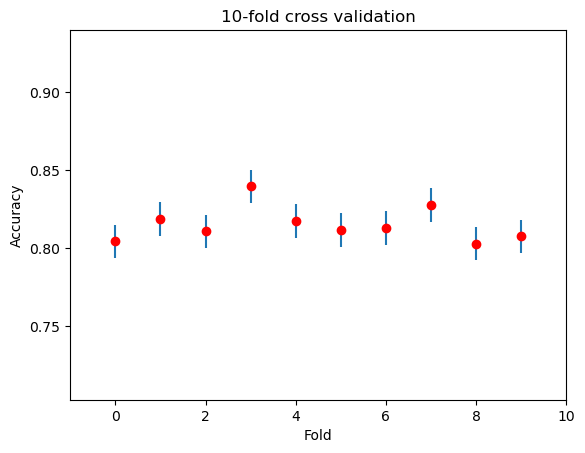

In [16]:
## preguntar como calcular los int de conf

import matplotlib.pyplot as plt 
x=[i for i in range(folds)] 
y=scores 
plt.axis([-1,10, min(scores)-0.1, max(scores)+0.1]) 
plt.ylabel('Accuracy') 
plt.xlabel('Fold') 
plt.title(f'{folds}-fold cross validation') 
plt.errorbar(x,y,yerr=std_dev,linestyle='None')
plt.plot(x,y,'ro') 
plt.show()

## Con shuffle